In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
social_data = "data\sentimentdataset.csv"
happyness_data = "data\WorldHappinessIndex2013-2023.csv"

# Read the mouse data and the study results
happyness_df = pd.read_csv(happyness_data)
social_df = pd.read_csv(social_data)

In [2]:
social_df2 = social_df[['Country', 'Year','Platform','Sentiment','Hashtags']]
happyness_df['Country'] = happyness_df['Country'].replace('United States', 'USA')
happyness_df['Country'] = happyness_df['Country'].replace('United Kingdom', 'UK')

In [3]:
# social_df2.info()
social_df2['Country'] = social_df2['Country'].str.strip()
unique_values = social_df2['Country'].unique()
print(unique_values)

['USA' 'Canada' 'UK' 'Australia' 'India' 'France' 'Brazil' 'Japan'
 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa' 'Spain'
 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark' 'Czech Republic'
 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway' 'Colombia'
 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']


C:\Users\nigro\AppData\Local\Temp\ipykernel_10016\1694308257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_df2['Country'] = social_df2['Country'].str.strip()


In [4]:
# happyness_df.info()
unique_values2 = happyness_df['Country'].unique()
print(unique_values2)

['Afghanistan' 'Singapore' 'Comoros' 'Sierra Leone' 'Congo' 'Serbia'
 'Congo Brazzaville' 'Senegal' 'Congo Kinshasa' 'Saudi Arabia' 'Rwanda'
 'Costa Rica' 'Russia' 'Croatia' 'Romania' 'Colombia' 'Cyprus' 'Czechia'
 'Puerto Rico' 'Denmark' 'Portugal' 'Poland' 'Djibouti' 'Philippines'
 'Dominican Republic' 'Peru' 'Ecuador' 'Paraguay' 'Egypt' 'Panama'
 'El Salvador' 'Qatar' 'Slovakia' 'Slovenia' 'China' 'Thailand' 'Bhutan'
 'Tanzania' 'Bolivia' 'Tajikistan' 'Bosnia and Herzegovina' 'Taiwan'
 'Botswana' 'Syria' 'Brazil' 'Switzerland' 'Sweden' 'Bulgaria' 'Swaziland'
 'Burkina Faso' 'Suriname' 'Burundi' 'Somalia' 'Chile' 'Somaliland' 'Chad'
 'South Africa' 'Central African Republic' 'Palestine' 'South Korea'
 'South Sudan' 'Spain' 'Cameroon' 'Sri Lanka' 'Cambodia' 'Sudan' 'Canada'
 'Togo' 'Pakistan' 'Oman' 'Iceland' 'Malta' 'India' 'Mali' 'Indonesia'
 'Maldives' 'Malaysia' 'Iran' 'Malawi' 'Iraq' 'Madagascar' 'Ireland'
 'Luxembourg' 'Israel' 'Mauritania' 'Lithuania' 'Libya' 'Liberia'
 'Ivory 

In [5]:
study_df = pd.merge(social_df2,happyness_df, on=['Country', 'Year'], how='left')
study_df.head(10)

,Country,Year,Platform,Sentiment,Hashtags,Index,Rank
0,USA,2023,Twitter,Positive,#Nature #Park,6.894,15.0
1,Canada,2023,Twitter,Negative,#Traffic #Morning,6.961,13.0
2,USA,2023,Instagram,Positive,#Fitness #Workout,6.894,15.0
3,UK,2023,Facebook,Positive,#Travel #Adventure,6.796,19.0
4,Australia,2023,Instagram,Neutral,#Cooking #Food,7.095,12.0
5,India,2023,Twitter,Positive,#Gratitude #PositiveVibes,4.036,126.0
6,Canada,2023,Facebook,Positive,#RainyDays #Cozy,6.961,13.0
7,USA,2023,Instagram,Positive,#MovieNight #MustWatch,6.894,15.0
8,USA,2023,Twitter,Negative,#Politics #Debate,6.894,15.0
9,Australia,2023,Facebook,Neutral,#Summer #BeachDays,7.095,12.0


In [6]:
study_df['Sentiment']= study_df['Sentiment'].str.strip()
emotions = study_df['Sentiment'].unique()

In [7]:
positive_emoID = [0,
7,
8,
9,
10,
11,
12,
13,
16,
17,
18,
21,
23,
24,
25,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
58,
59,
60,
61,
62,
63,
64,
65,
66,
67,
68,
79,
81,
82,
83,
84,
85,
86,
87,
89,
90,
91,
92,
93,
94,
96,
98,
99,
102,
103,
104,
105,
106,
107,
108,
110,
112,
113,
114,
115,
116,
117,
119,
120,
137,
138,
139,
140,
142,
143,
144,
145,
146,
149,
150,
151,
152,
153,
154,
155,
157,
158,
159,
160,
161,
165,
168,
169,
170,
173,
174,
175,
176,
177,
178,
179,
180,
181,
182,
184,
190,
]

In [8]:
negative_emoID = [1,
3,
4,
5,
6,
14,
15,
20,
22,
26,
40,
41,
42,
43,
44,
45,
47,
48,
49,
50,
51,
69,
71,
72,
73,
74,
75,
76,
77,
78,
100,
121,
122,
123,
124,
125,
126,
127,
128,
129,
130,
131,
132,
133,
134,
135,
136,
162,
163,
164,
166,
167,
185,
186,
187,
188,
189,
]

In [9]:
neutral_emoID = [2,
19,
39,
46,
52,
53,
54,
55,
56,
57,
70,
78,
80,
88,
95,
97,
101,
109,
111,
118,
141,
147,
148,
156,
171,
172,
183,
]

In [10]:
positive_emo = emotions[positive_emoID]
negative_emo = emotions[negative_emoID]
neutral_emo = emotions[neutral_emoID]

print(len(positive_emo))
print(len(negative_emo))
print(len(neutral_emo))

108
57
27


In [11]:
positive_df = []
for index, row in study_df.iterrows():
    if row['Sentiment'] in positive_emo:
        positive_df.append(row)

positive_df = pd.DataFrame(positive_df)

In [12]:
negative_df = []
for index, row in study_df.iterrows():
    if row['Sentiment'] in negative_emo:
        negative_df.append(row)

negative_df =pd.DataFrame(negative_df)

In [13]:
neutral_df = []
for index, row in study_df.iterrows():
    if row['Sentiment'] in neutral_emo:
        neutral_df.append(row)

neutral_df = pd.DataFrame(neutral_df)

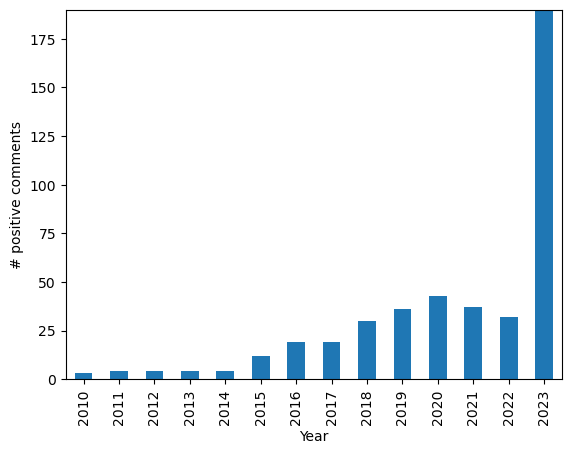

In [14]:
positive_df.groupby('Year')['Sentiment'].count().plot(kind='bar', ylabel='# positive comments')
plt.ylim(0, 190)
plt.show()

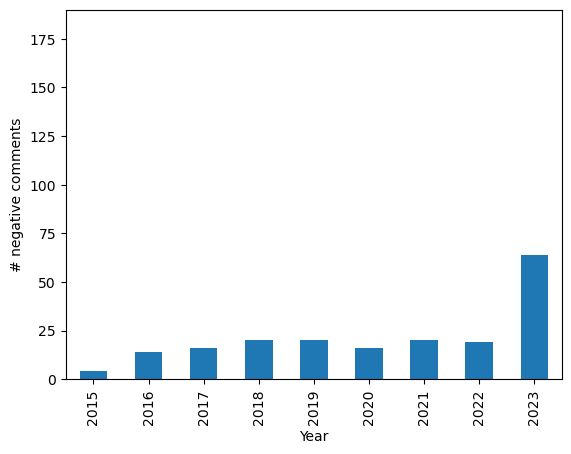

In [15]:
negative_df.groupby('Year')['Sentiment'].count().plot(kind='bar', ylabel='# negative comments')
plt.ylim(0, 190)
plt.show()

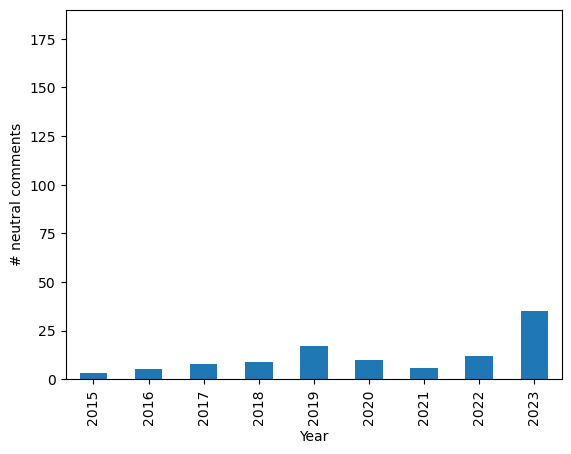

In [16]:
neutral_df.groupby('Year')['Sentiment'].count().plot(kind='bar', ylabel='# neutral comments')
plt.ylim(0, 190)
plt.show()

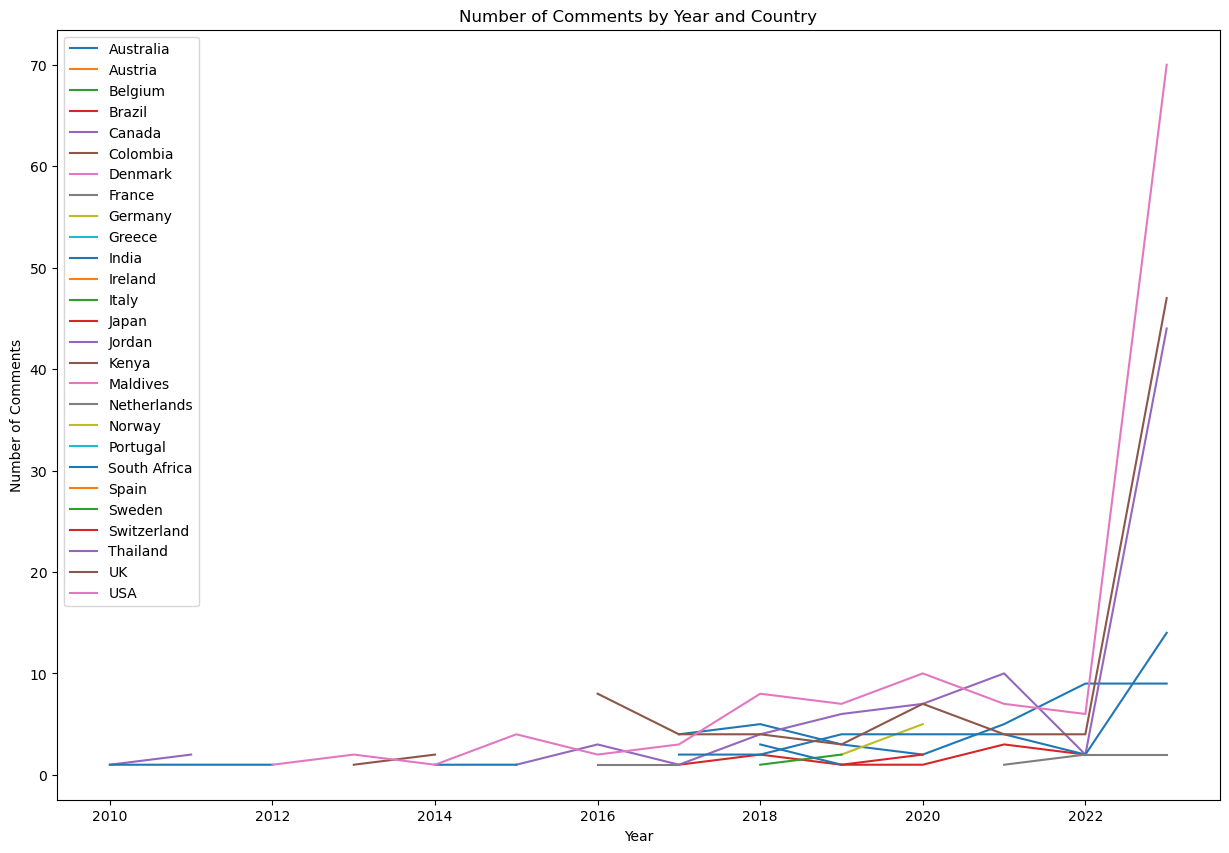

In [17]:
grouped_data = positive_df.groupby(['Year', 'Country'])['Sentiment'].count().unstack()

# Plot each country's data as a separate line
plt.figure(figsize=(15, 10))
for country in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[country], label=country)

plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.title('Number of Comments by Year and Country')
plt.legend()  # Add legend to differentiate different countries
plt.show()
